# Classification with LDA

Program ini dijalankan menggunakan [Google Colab](https://colab.research.google.com)

Input yang digunakan pada program ini merupakan file dengan deskripsi 18 kolom fitur Image Quality Assessment dan 1 kolom kelas dengan ekstensi **.csv**

fitur tercantum pada [qualitymeasure](https://https://www.idiap.ch/software/bob/docs/bob/bob.ip.qualitymeasure/master/index.html) dari Bob Toolbox Machine Learning

Versi library yang digunakan saat pengerjaan

> numpy versi 1.19.5

> pandas versi 1.1.5

> matplotlib versi 3.2.2

> scikit-learn versi 0.22.2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#18-Feature
label18 = ['mse00', 'psnr01', 'ad02', 'sc03', 'nk04', 'md05',
         'lmse06', 'nae07', 'snrv08', 'ramdv09', 'mas10', 'mams11',
         'sme12', 'gme16', 'gpe17', 'ssim18', 'vif19', 'hlfi25','class']

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MBKM Riset/Antispoofing IQA/Dataset/dataset_iqa_3.csv")

In [ ]:
df_train = df[label18].loc[(df.session != 3)]
df_test = df[label18].loc[(df.session == 3)]

In [ ]:
train =  df_train.copy()
test = df_test.copy()

In [ ]:
encode_map = {"real":0,
              "paper":1,
              "replay":1}

train['class'].replace(encode_map, inplace=True)
test['class'].replace(encode_map, inplace=True)

In [ ]:
X_train, y_train = train.iloc[:,:18], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:18], test.iloc[:,-1]

In [ ]:
y_index = np.array(y_test.index)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
K=18 #nilai jumlah fitur yang akan digunakan
bestfeatures = SelectKBest(score_func=f_classif, k= K)
best = bestfeatures.fit(X_train, y_train)
X_train_fs = bestfeatures.transform(X_train_sc)
X_test_fs = bestfeatures.transform(X_test_sc)

In [ ]:
#menampilkan skor dari f_classif (Anova-F)
dfscores = pd.DataFrame(best.scores_)
dfcolumns = pd.DataFrame(label18)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(18,'Score'))

In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 1)
lda.fit_transform(X_train_fs, y_train)

In [ ]:
y_pred = lda.predict(X_test_fs)

In [ ]:
print(f'Linear Discriminant {K} fitur')
print(classification_report(y_test, y_pred))

Linear Discriminant 18 fitur
              precision    recall  f1-score   support

           0       0.64      0.29      0.40       120
           1       0.84      0.96      0.90       480

    accuracy                           0.82       600
   macro avg       0.74      0.62      0.65       600
weighted avg       0.80      0.82      0.80       600



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

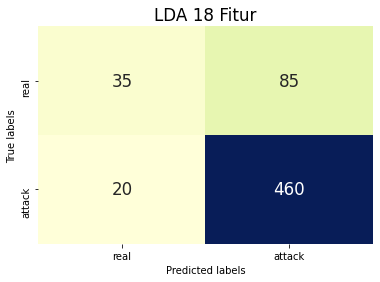

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.set(font_scale=1.4)
sns.heatmap(np.array(confusion_matrix(y_test, y_pred)),
            annot=True, fmt="d", cbar =False, cmap="YlGnBu")

tl = f'LDA {K} Fitur'
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['real', 'attack']); ax.yaxis.set_ticklabels(['real', 'attack'])
plt.title(tl)

plt.savefig(f"{tl}.png")
files.download(f"{tl}.png") 

## Error Analysis

In [ ]:
diff_list, diff_index = [], []
for i in range(len(y_test)):
  if y_test[i] == y_pred[i]: 
    diff_list.append(True)
  else:
    diff_index.append(i)
    diff_list.append(False)

In [ ]:
df_err = df_test.iloc[diff_index, :]

In [ ]:
df_error = df.iloc[df_err.index,:]

In [ ]:
df_error.to_csv("error_lda.csv")